In [ ]:
# Use pip to install a Python package directly from a Git repository
# The package is the COCO API from the GitHub repository
# The #subdirectory=PythonAPI part specifies that only the PythonAPI subdirectory of the repository should be installed
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-csysjqxb
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=273715 sha256=d8b21170511ef8c69174dbdd8d14c26aeadc79757f43d577c793d66f1944e1ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-v5s6kwph/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling pycocotools-2.0.7:
      Successfully uninstalled pycocotools-2.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
detectron2 0.5+cu102 requires pycocotools>=2.0.2, but you have pycocotools 2.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


..

In [ ]:
# Enable inline plotting in Jupyter notebooks
%matplotlib inline

# Import necessary libraries and modules
from pycocotools.coco import COCO  # COCO API for working with COCO datasets
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random

# Set the default figure size for Matplotlib
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# Import additional libraries for visualization
import os
import seaborn as sns  # Seaborn for statistical data visualization
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image  # Python Imaging Library for image processing

..

In [ ]:
# Set the directory paths and file names for COCO validation data
dataDir = '../input/coco-car-damage-detection-dataset/val'  # Root directory for the COCO validation dataset
dataType = 'COCO_val_annos'  # Type of annotations for the COCO validation dataset
mul_dataType = 'COCO_mul_val_annos'  # Type of annotations for the COCO validation dataset with multiple annotations per image

# Construct file paths for annotation files
annFile = '{}/{}.json'.format(dataDir, dataType)  # File path for the COCO validation annotations
mul_annFile = '{}/{}.json'.format(dataDir, mul_dataType)  # File path for the COCO validation annotations with multiple annotations

# Set the directory path for images
img_dir = "../input/coco-car-damage-detection-dataset/img"  # Directory path for the COCO validation images

..

In [ ]:
# Initialize COCO API for single-instance annotations
coco = COCO(annFile)

# Initialize COCO API for multiple annotations per image
mul_coco = COCO(mul_annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


..

In [ ]:
# Single Class - Damage Dataset
# Load categories for single-instance annotations
cats = coco.loadCats(coco.getCatIds())
# Get category names
nms = [cat['name'] for cat in cats]
# Display COCO categories for damages
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

# Get unique supercategories for single-instance annotations
nms = set([cat['supercategory'] for cat in cats])
# Display COCO supercategories for damages
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

# Multi Class - Parts Dataset
# Load categories for multiple annotations per image
mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
# Get category names
mul_nms = [mul_cat['name'] for mul_cat in mul_cats]
# Display COCO categories for parts
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

# Get unique supercategories for multiple annotations per image
mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
# Display COCO supercategories for parts
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))


COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [ ]:
# Get category IDs for the 'damage' category
catIds = coco.getCatIds(catNms=['damage'])
# Get image IDs containing the 'damage' category
imgIds = coco.getImgIds(catIds=catIds)

In [ ]:
# Use the random module to select a random image ID from the list of image IDs
random_img_id = random.choice(imgIds)
# Print a message indicating the randomly selected image ID
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

7 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [ ]:
# Get the image ID using the randomly selected image ID
imgId = coco.getImgIds(imgIds=[random_img_id])
# Load the image details using the COCO API
img = coco.loadImgs(imgId)[0]
# Print the details of the selected image
print("Image details \n", img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '74.jpg', 'flickr_url': '', 'height': 1024, 'id': 7, 'license': 1, 'width': 1024}


..

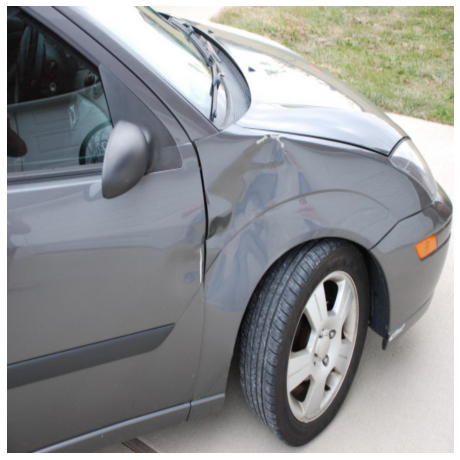

In [ ]:
# Use skimage to read and load the image using the file path
I = io.imread(img_dir + '/' + img['file_name'])

# Plot the image using Matplotlib
plt.axis('off')  # Turn off axis labels and ticks
plt.imshow(I)  # Display the image
plt.show()  # Show the plot

..

In [ ]:
# Get annotation IDs for the damage annotations associated with the selected image
annIds = coco.getAnnIds(imgIds=imgId, iscrowd=None)
# Load the annotations using the COCO API
anns = coco.loadAnns(annIds)

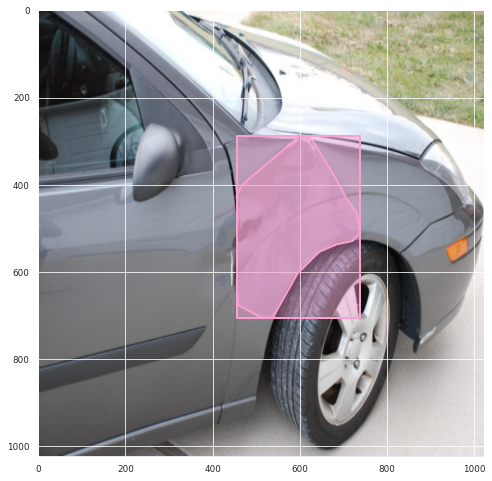

In [ ]:
# Plot the original image
plt.imshow(I)
# Display axis labels and ticks
plt.axis('on')
# Use the COCO API's showAnns function to plot the damage annotations on the image
coco.showAnns(anns, draw_bbox=True)

..

In [ ]:
# Get annotation IDs for the parts annotations associated with the selected image
mul_annIds = mul_coco.getAnnIds(imgIds=imgId, iscrowd=None)
# Load the annotations using the COCO API
mul_anns = mul_coco.loadAnns(mul_annIds)

In [ ]:
# Create a dictionary to map category_id to category name for parts annotations
category_map = dict()

# Iterate over the values (categories) in the cats dictionary of mul_coco
for ele in list(mul_coco.cats.values()):
    # Update the dictionary with the mapping between category_id and category name
    category_map.update({ele['id']: ele['name']})

In [ ]:
print(category_map)

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}


Parts are: ['door', 'hood', 'headlamp', 'front_bumper']


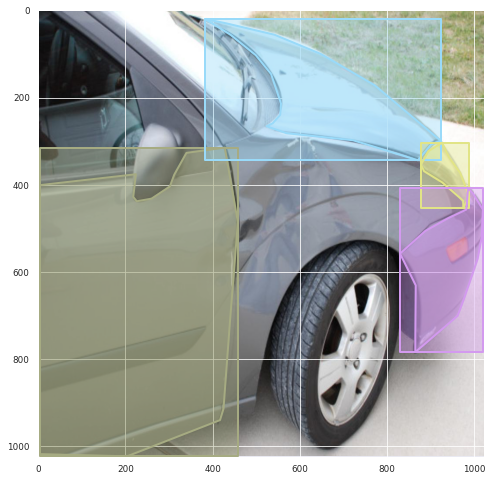

In [ ]:
# Create a list to store the parts in the image
parts = []

# Iterate over the annotations in mul_anns
for region in mul_anns:
    # Append the category name corresponding to the category_id to the parts list
    parts.append(category_map[region['category_id']])

# Print the list of parts
print("Parts are:", parts)

# Plot the original image
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
# Display axis labels and ticks
plt.axis('on')
# Use mul_coco's showAnns function to plot the parts annotations on the image
mul_coco.showAnns(mul_anns, draw_bbox=True)

..

..

In [ ]:
# Install Detectron2 using the specified wheel URL
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html
  Using cached pycocotools-2.0.7-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (403 kB)
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


..

In [ ]:
# Import PyTorch and torchvision libraries
import torch, torchvision

# Print the version of PyTorch and whether CUDA (GPU support) is available
print(torch.__version__, torch.cuda.is_available())

1.7.0 True


In [ ]:
# Use assert to check whether the PyTorch version starts with "1.7"
assert torch.__version__.startswith("1.7")

In [ ]:
# Import the necessary modules from Detectron2
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# Import some common Detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params for plotting
plt.rcParams["figure.figsize"] = [16, 9]


In [ ]:
# Run the detectron2 utility script to collect environment information
# Check for the presence of the "failed" word in the output
# If "failed" is not present, then things are fine
!python -m detectron2.utils.collect_env

----------------------  ------------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) [GCC 7.3.0]
numpy                   1.17.5
detectron2              0.5 @/opt/conda/lib/python3.7/site-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.2
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.0 @/opt/conda/lib/python3.7/site-packages/torch
PyTorch debug build     True
GPU available           Yes
GPU 0                   Tesla P100-PCIE-16GB (arch=6.0)
CUDA_HOME               /usr/local/cuda
Pillow                  8.0.1
torchvision             0.8.1 @/opt/conda/lib/python3.7/site-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5
fvcore                  0.1.5.post20221221
iopath                  0.1.8
cv2                     4.4.0
----

..

In [ ]:
# Define the base directory for the COCO car damage detection dataset
dataset_dir = "../input/coco-car-damage-detection-dataset"

# Define the subdirectories for images, training data, and validation data
img_dir = "img/"
train_dir = "train/"
val_dir = "val/"


If you want to use a custom dataset while also reusing detectron2’s data loaders, you will need to

*  Register your dataset (i.e., tell detectron2 how to obtain your dataset).

* Optionally, register metadata for your dataset.

In [ ]:
# Import the necessary function for registering COCO instances
from detectron2.data.datasets import register_coco_instances

# Register the training dataset
register_coco_instances(
    "car_dataset_train1",  # Dataset name for training
    {},  # Metadata dictionary (empty in this case)
    os.path.join(dataset_dir, train_dir, "COCO_train_annos.json"),  # Path to the training annotations JSON file
    os.path.join(dataset_dir, img_dir)  # Path to the directory containing training images
)

# Register the validation dataset
register_coco_instances(
    "car_dataset_val1",  # Dataset name for validation
    {},  # Metadata dictionary (empty in this case)
    os.path.join(dataset_dir, val_dir, "COCO_val_annos.json"),  # Path to the validation annotations JSON file
    os.path.join(dataset_dir, img_dir)  # Path to the directory containing validation images
)


In [ ]:
# Retrieve dataset dictionaries for the registered training dataset
dataset_dicts = DatasetCatalog.get("car_dataset_train")

# Retrieve metadata dictionaries for the registered training dataset
metadata_dicts = MetadataCatalog.get("car_dataset_train")

[01/15 07:21:09 d2.data.datasets.coco]: Loaded 59 images in COCO format from ../input/coco-car-damage-detection-dataset/train/COCO_train_annos.json


...

In [ ]:
# Implementing a custom Trainer Module to use COCO validation evaluation during training
# TODO: Add custom data augmentation

class CocoTrainer(DefaultTrainer):
    """
    Custom Trainer class that inherits from DefaultTrainer in Detectron2.
    Overrides the build_evaluator method to use COCO validation evaluation during training.
    """

    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        """
        Build a COCO evaluator for validation evaluation during training.

        Args:
            cfg (CfgNode): Detectron2 configuration node.
            dataset_name (str): Name of the dataset.
            output_folder (str): Output folder for evaluation results.

        Returns:
            COCOEvaluator: Evaluator for COCO validation evaluation.
        """

        # If output_folder is not provided, create "coco_eval" folder
        if output_folder is None:
            os.makedirs("coco_eval", exist_ok=True)
            output_folder = "coco_eval"

        # Return a COCOEvaluator for the specified dataset
        return COCOEvaluator(dataset_name, cfg, False, output_folder)


In [ ]:
# Create a Detectron2 configuration object
cfg = get_cfg()

# Merge with a Mask R-CNN configuration from the model zoo
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# Set training and validation datasets
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_val",)

# Configure data loader settings
cfg.DATALOADER.NUM_WORKERS = 4

# Use pre-trained weights from the model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Configure solver settings
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001  # Pick a suitable learning rate
cfg.SOLVER.WARMUP_ITERS = 700
cfg.SOLVER.MAX_ITER = 800  # Adjust based on validation mAP performance
cfg.SOLVER.STEPS = (600, 750)
cfg.SOLVER.GAMMA = 0.1  # Adjust based on your preference

# Configure ROI Heads settings
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # Faster, good enough for this dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Set to 1 for your one class (damage)
cfg.MODEL.RETINANET.NUM_CLASSES = 1  # Set to 1 for your one class (damage)

# Evaluation settings
cfg.TEST.EVAL_PERIOD = 600

# Clear any logs from previous runs
# TODO: Add timestamp to logs
!rm -rf {cfg.OUTPUT_DIR}

# Create the output directory if it doesn't exist
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Create and initialize the custom CocoTrainer
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/15 07:22:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

..

..

In [ ]:
def smooth(scalars, weight=0.6):
    """
    Smoothes a list of scalars using exponential moving average.

    Reference: https://github.com/plotly/dash-live-model-training/blob/master/app.py#L163
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed


def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """Re-draw the tf summary events plots using seaborn.

    :param logdir: Path to the directory having event logs.
    :param savedir: Path to save the seaborn graphs.
    :param smoothing: Smoothing window space for the plots.
    :param no_title: If True, do not display titles on the plots.
    :param no_legend: If True, do not display legends on the plots.
    :param no_axis_labels: If True, do not display axis labels on the plots.
    :return: List of paths to the saved plots.
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'

    plots = []

    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # We recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # Only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()
            _plt = sns.lineplot(x, y, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x, y_smooth, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())

        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return plots

In [ ]:
plots = plot(logdir= './output', savedir= './')

<Figure size 1152x648 with 0 Axes>

In [ ]:
plots

['./seaborn/rpn/num_pos_anchors.png',
 './seaborn/rpn/num_neg_anchors.png',
 './seaborn/roi_head/num_fg_samples.png',
 './seaborn/roi_head/num_bg_samples.png',
 './seaborn/fast_rcnn/cls_accuracy.png',
 './seaborn/fast_rcnn/fg_cls_accuracy.png',
 './seaborn/fast_rcnn/false_negative.png',
 './seaborn/mask_rcnn/accuracy.png',
 './seaborn/mask_rcnn/false_positive.png',
 './seaborn/mask_rcnn/false_negative.png',
 './seaborn/data_time.png',
 './seaborn/total_loss.png',
 './seaborn/loss_cls.png',
 './seaborn/loss_box_reg.png',
 './seaborn/loss_mask.png',
 './seaborn/loss_rpn_cls.png',
 './seaborn/loss_rpn_loc.png',
 './seaborn/lr.png',
 './seaborn/time.png',
 './seaborn/eta_seconds.png',
 './seaborn/bbox/AP.png',
 './seaborn/bbox/AP50.png',
 './seaborn/bbox/AP75.png',
 './seaborn/bbox/APs.png',
 './seaborn/bbox/APm.png',
 './seaborn/bbox/APl.png',
 './seaborn/segm/AP.png',
 './seaborn/segm/AP50.png',
 './seaborn/segm/AP75.png',
 './seaborn/segm/APs.png',
 './seaborn/segm/APm.png',
 './seaborn

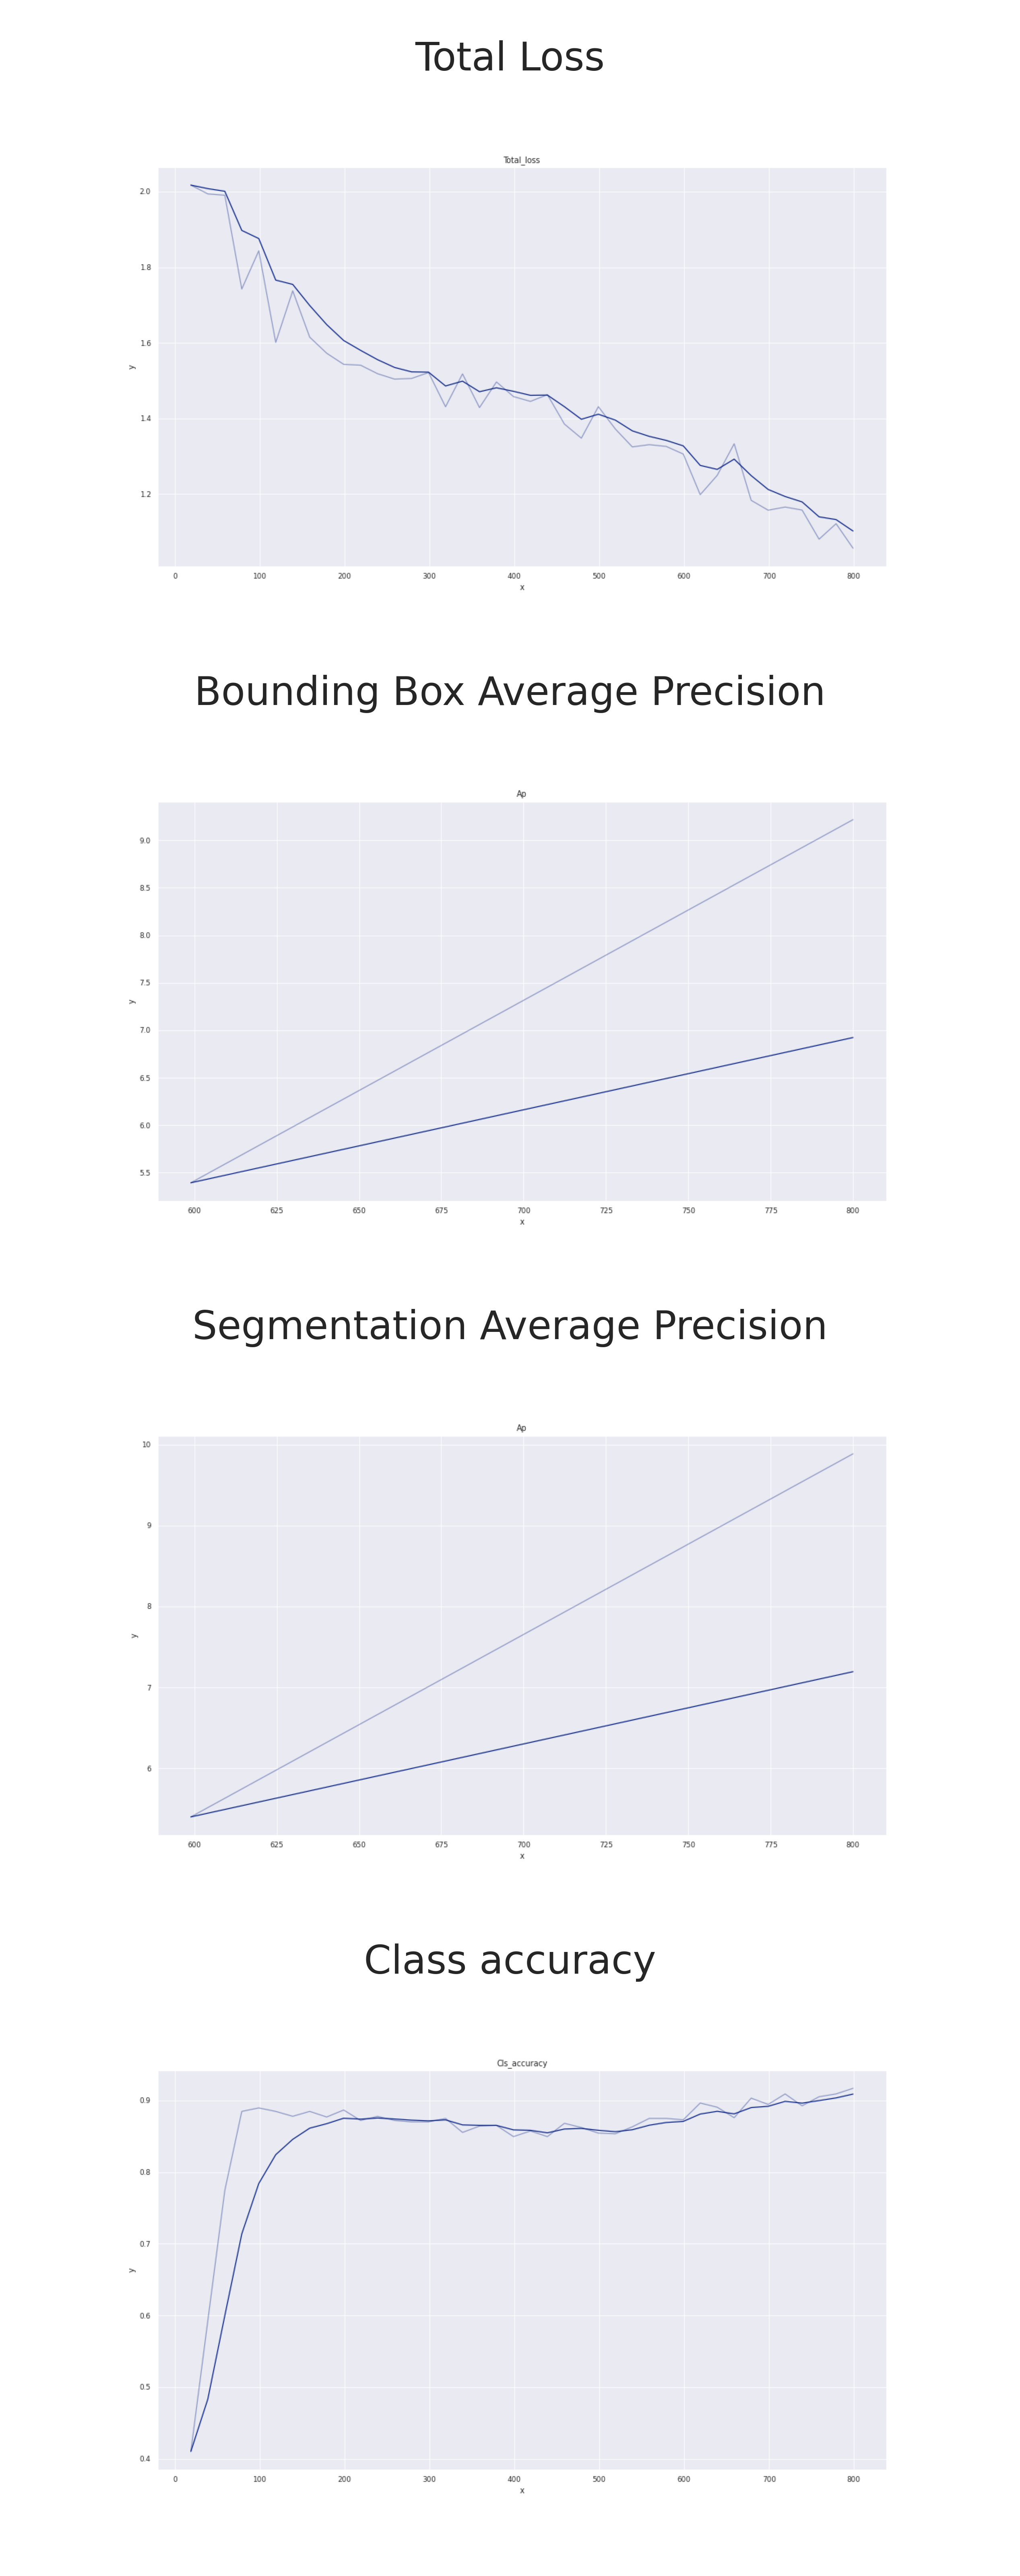

In [ ]:
my_dpi = 1000
fig, ax = plt.subplots(4, 1, figsize=(10, 8), dpi=my_dpi)

ax[0].set_title('Total Loss', fontsize=7)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow(Image.open('./seaborn/total_loss.png'))

ax[1].set_title('Bounding Box Average Precision', fontsize=7)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].imshow(Image.open('./seaborn/bbox/AP.png'))

ax[2].set_title('Segmentation Average Precision', fontsize=7)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(Image.open('./seaborn/segm/AP.png'))

ax[3].set_title('Class accuracy', fontsize=7)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].imshow(Image.open('./seaborn/fast_rcnn/cls_accuracy.png'))

* I think the training worked well as the loss has decreased over the runs.
* The class accuracy and average precision has improved over the runs.

...

In [ ]:
# Create a COCOEvaluator for the "car_dataset_val" dataset using the provided configuration
evaluator = COCOEvaluator("car_dataset_val", cfg, False, output_dir="./output/")

# Build a test loader for the validation dataset
val_loader = build_detection_test_loader(cfg, "car_dataset_val")

# Perform inference on the validation dataset using the trainer's model and the created evaluator
evaluation_results = inference_on_dataset(trainer.model, val_loader, evaluator)

# Print the evaluation results to the console
print(evaluation_results)

WARNING [01/15 07:28:53 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[01/15 07:28:53 d2.data.datasets.coco]: Loaded 11 images in COCO format from ../input/coco-car-damage-detection-dataset/val/COCO_val_annos.json
[01/15 07:28:53 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/15 07:28:53 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[01/15 07:28:53 d2.data.common]: Serialized dataset takes 0.01 MiB
[01/15 07:28:53 d2.evaluation.evaluator]: Start inference on 11 batches
[01/15 07:28:57 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0008 s/iter. Inference: 0.0797 s/iter. Eval: 0.2673 s/iter. Total: 0.3478 s/iter. ETA=0:00:00
[01/15 07:28:57 d2.evaluation.evaluator]: Total inference time: 0:00:02.155108 (0.359185 s 

In [ ]:
# Set the model weights for inference
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

# Set a custom testing threshold for the model's ROI heads
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

# Specify the dataset for testing (validation dataset in this case)
cfg.DATASETS.TEST = ("car_dataset_val", )

# Create a DefaultPredictor using the configured settings
predictor = DefaultPredictor(cfg)

In [ ]:
# Retrieve validation dataset and metadata
val_dataset_dicts = DatasetCatalog.get("car_dataset_val")
val_metadata_dicts = MetadataCatalog.get("car_dataset_val")

[01/15 07:28:58 d2.data.datasets.coco]: Loaded 11 images in COCO format from ../input/coco-car-damage-detection-dataset/val/COCO_val_annos.json


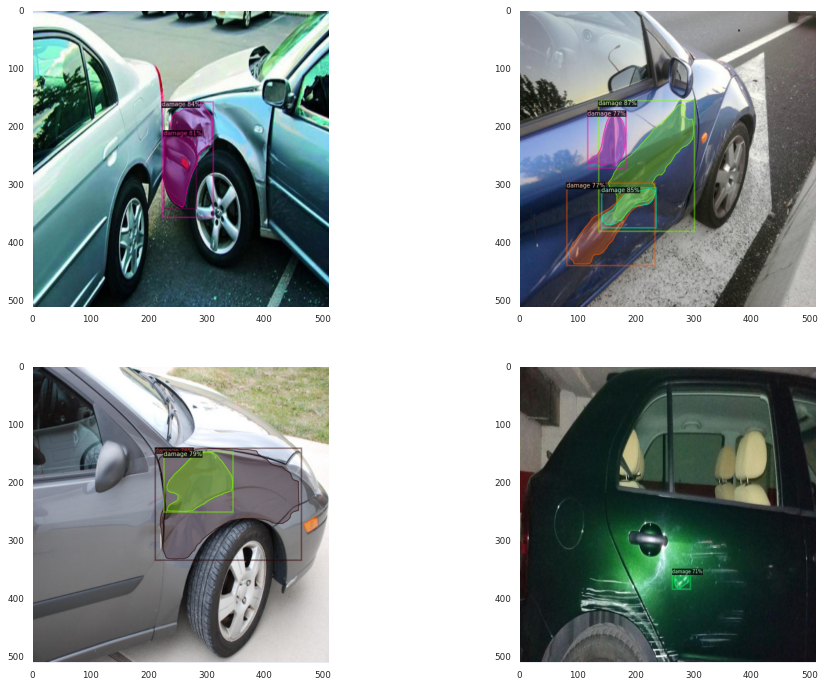

In [ ]:
# Create a 2x2 subplot for visualization
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
indices = [ax[0][0], ax[1][0], ax[0][1], ax[1][1]]

# Iterate over a random sample of 4 validation dataset entries
i = -1
for d in random.sample(val_dataset_dicts, 4):
    i += 1
    im = io.imread(d["file_name"])  # Load image
    outputs = predictor(im)  # Perform inference using the predictor

    # Visualize the results using Detectron2's Visualizer
    v = Visualizer(im[:, :, ::-1], metadata=val_metadata_dicts, scale=0.5, instance_mode=ColorMode.IMAGE_BW)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Display the visualization in the subplot
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])

### Conclusion
* I think the results are quite fine even when the training data was around 60 images.
* Data augmentation can significantly improve the results.
* I will try doing multiclass object detection next.